**Uni-Variate Linear Regression**



---



IMPORTING ALL THE REQUIRED LIBRARIES :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

READING THE DATA :

In [4]:
d=pd.read_csv("/content/Company_data.csv")
d.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


"dataframe.corr()" is used to find the pairwise correlation of all columns in the dataframe. Since we're taking only one input variable(univariate),it is necessary to select the variable which is closely related to the output vector. We use corr() function to find that variable/column.





In [19]:
d.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Dividing the dataset into input and output sets:

In [20]:
X = d.drop('Sales',axis=1).values
y = d['Sales'].values

In [21]:
X_tv = X[:,0]
X_tv = X_tv.reshape(-1,1)
y = y.reshape(-1,1)

Dividing the dataset into training and testing datasets. We select the size of training and testing data by assigning a value to the test_size parameter(0.25 here) i.e., the size of training data = 75% and the size of testing data = 25%

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tv,y,test_size = 0.25,random_state=42)

In [23]:
X_train.shape,y_train.shape

((150, 1), (150, 1))

Scatter plot between X_train and y_train :

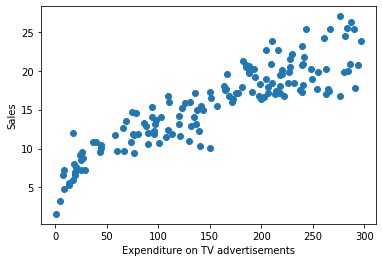

In [24]:
plt.scatter(X_train,y_train)
plt.xlabel("Expenditure on TV advertisements")
plt.ylabel("Sales")
plt.show()

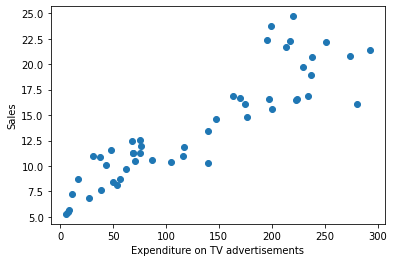

In [25]:
plt.scatter(X_test,y_test)
plt.xlabel("Expenditure on TV advertisements")
plt.ylabel("Sales")
plt.show()

In [26]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

LinearRegression()

In [ ]:
Performance metrics on training data:

In [28]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred1 = reg.predict(X_train)
print("MAE =",mean_absolute_error(y_train,y_pred1))
print("MSE =",mean_squared_error(y_train,y_pred1))
print("RMSE =",np.sqrt(mean_absolute_error(y_train,y_pred1)))
print("R2_SCORE =",r2_score(y_train,y_pred1))

MAE = 1.8203818541994503
MSE = 5.136151288979386
RMSE = 1.349215273482868
R2_SCORE = 0.811194552365148


In [ ]:
Performance metrics on testing data:

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred2 = reg.predict(X_test)
print("MAE =",mean_absolute_error(y_test,y_pred2))
print("MSE =",mean_squared_error(y_test,y_pred2))
print("RMSE =",np.sqrt(mean_absolute_error(y_test,y_pred2)))
print("R2_SCORE =",r2_score(y_test,y_pred2))

MAE = 1.8651146911099161
MSE = 5.513351187165511
RMSE = 1.3656920191280009
R2_SCORE = 0.7971876919875108


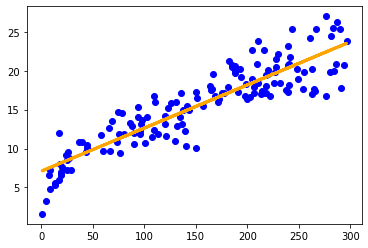

In [34]:

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='orange', linewidth=3)
plt.show()

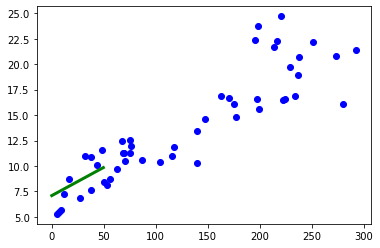

In [36]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='green', linewidth=3)
plt.show()

Though our model is working well on the train_data and test_data, we are not sure that our model works well on unseen data(Generalized). To test our model, we take some random values between minimum and maximum values of input data i.e, X_tv. To do this, we take the help of linspace() function that generates linearly spaced vectors between the two parameters given.

In [38]:
prediction_space = np.linspace(min(X_tv), max(X_tv)).reshape(-1,1)

Plotting the predictions on unseen data :

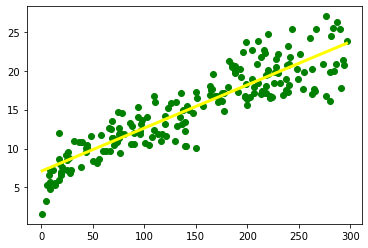

In [40]:
plt.scatter(X_tv, y, color='green')
plt.plot(prediction_space, reg.predict(prediction_space), color='yellow', linewidth=3)
plt.show()